In [116]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

%matplotlib widget
plt.style.use('RasmusStyle.mplstyle')
%matplotlib widget

import os
# import csv
import math

import datetime
from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[:-math.ceil(meanWidth)+1]
def rnTime3(t,meanWidth):
    return t[math.ceil(meanWidth)+1:]

saveFigures is set to: True
Done loading packages


In [117]:

pathFigs = '../Figures/NatDag2022/'
filePath= '../ExcessData/HMD/'


In [118]:
dfDK = pd.read_csv(filePath + 'DNKstmfout.csv')
dfSE = pd.read_csv(filePath + 'SWEstmfout.csv')

In [119]:
# Make date column

# r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
dateDK = dfDK.Year.astype(str) + '-W'+dfDK.Week.astype(str).str.zfill(2)
# dfDK = dfDK.copy() 
dfDK['Date'] = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dateDK]

dateSE = dfSE.Year.astype(str) + '-W'+dfSE.Week.astype(str).str.zfill(2)
# dfSE2 = dfSE.copy() 
dfSE['Date'] = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dateSE]

In [120]:
# Cutoff early data 
# dfSE.Date.min()

dfSE = dfSE[dfSE.Year >= 2007].reset_index(drop=True)

# Yearly figures

In [121]:
# yearRange = np.arange(2007,2022)

# tot_DK = []
# tot_SE = []
# totRat_DK = []
# totRat_SE = []

# for year in yearRange:
#     tot_DK.append(dfDK[dfDK.Year == year].Total.sum())
#     tot_SE.append(dfSE[dfSE.Year == year].Total.sum())
#     totRat_DK.append(dfDK[dfDK.Year == year]['Total.1'].sum())
#     totRat_SE.append(dfSE[dfSE.Year == year]['Total.1'].sum())


In [122]:
dfDKgroup = dfDK.groupby('Year').sum()
dfSEgroup = dfSE.groupby('Year').sum()

yearRangeFull = dfDKgroup.index 
totFull_DK = dfDKgroup.Total
totRatFull_DK = dfDKgroup['Total.1']

yearRange = yearRangeFull[:-3]
tot_DK = totFull_DK[:-3]
totRat_DK = totRatFull_DK[:-3]

# yearRangeFull = dfSEgroup.index 
# tot_SE = dfSEgroup.Total
# totRat_SE = dfSEgroup['Total.1']


In [123]:
# fig,(ax1,ax2) = plt.subplots(2,1)

# ax1.plot(yearRange,tot_DK,'.-')
# # ax2.plot(yearRange,tot_SE,'.-')

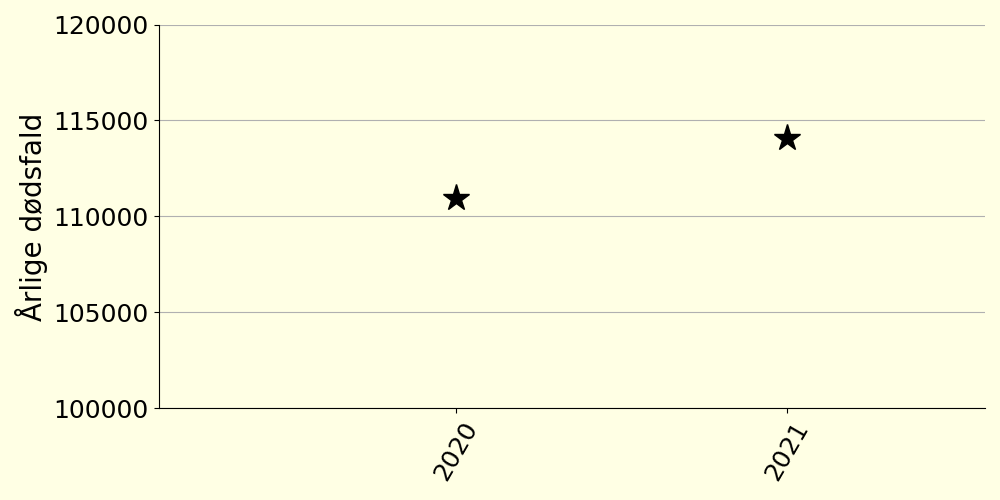

In [124]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(yearRange,tot_DK,'k.',markersize=20)
ax.plot(yearRangeFull[-3:-1],totFull_DK[-3:-1],'k*',markersize=20) 
# ax.bar(yearRange,tot_DK,color='k')
# ax.bar(yearRangeFull[-3:-1],totFull_DK[-3:-1],color='k')

# ax.set_ylim([100000,115000])
ax.set_ylim([100000,120000])
ax.set_yticks(np.arange(100000,120000+1,5000))

ax.set_ylabel('Årlige dødsfald')

firstYear = 2007
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))


if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2007ogfrem')


firstYear = 2014
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))


if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2014ogfrem')
    
    
firstYear = 2020
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))


if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2020and2021')


# Gennemsnit

In [136]:
avgLastFive = np.average(tot_DK[-5:])

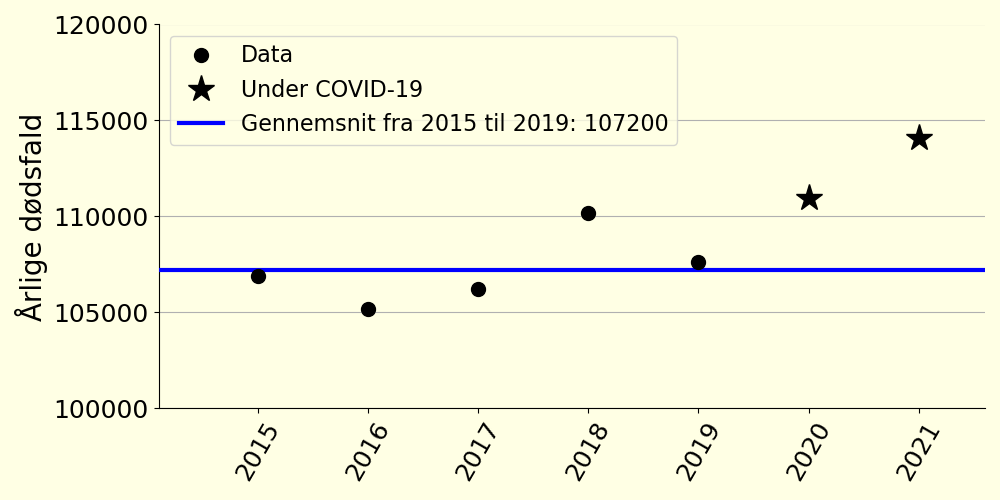

In [165]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(yearRange,tot_DK,'k.',markersize=20,label='Data',zorder=5)
ax.plot(yearRangeFull[-3:-1],totFull_DK[-3:-1],'k*',markersize=20,label='Under COVID-19') 
# ax.bar(yearRange,tot_DK,color='k')
# ax.bar(yearRangeFull[-3:-1],totFull_DK[-3:-1],color='k')

ax.axhline(avgLastFive,color='b',label=f'Gennemsnit fra 2015 til 2019: {avgLastFive:5.0f}',zorder=4)

# ax.set_ylim([100000,115000])
ax.set_ylim([100000,120000])
ax.set_yticks(np.arange(100000,120000+1,5000))

ax.set_ylabel('Årlige dødsfald')


firstYear = 2015
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))

ax.legend()

fig.tight_layout()

if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2015gnmsnit')

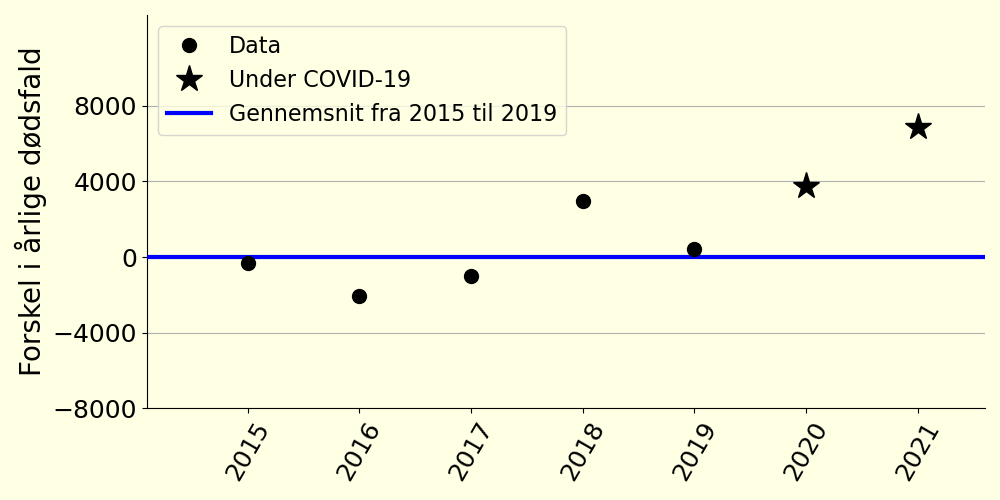

In [166]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(yearRange,tot_DK-avgLastFive,'k.',markersize=20,label='Data',zorder=4)
ax.plot(yearRangeFull[-3:-1],totFull_DK[-3:-1]-avgLastFive,'k*',markersize=20,label='Under COVID-19') 
# ax.bar(yearRange,tot_DK,color='k')
# ax.bar(yearRangeFull[-3:-1],totFull_DK[-3:-1],color='k')

# ax.axhline(0,color='b',label=f'Gennemsnit fra 2015 til 2019: {avgLastFive:5.0f}')
ax.axhline(0,color='b',label=f'Gennemsnit fra 2015 til 2019',zorder=3)

# ax.set_ylim([100000,115000])
ax.set_ylim([100000-avgLastFive,120000-avgLastFive])
ax.set_yticks(np.arange(100000-avgLastFive,120000-avgLastFive+1,5000))
ax.set_yticks(np.arange(-8000,8000+1,4000))

ax.set_ylabel('Forskel i årlige dødsfald')


firstYear = 2015
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))

ax.legend()

fig.tight_layout()

if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2015gnmsnit_residual')

# Lineært fit

In [167]:
curX = yearRange[-5:]
curY = tot_DK[-5:].values

sumX = np.sum(curX)
sumY = np.sum(curY)
sumX2 = np.sum(curX**2)
sumY2 = np.sum(curY**2)
sumXY = np.sum(curX*curY)
N = 5


top1 = sumY*sumX2
top2 = sumX*sumXY
bot1 = N * sumX2
bot2 = sumX*sumX
intersect = (top1-top2)/(bot1-bot2)

top1 = N * sumXY
top2 = sumX*sumY
bot1 = N*sumX2
bot2 = sumX*sumX
slope = (top1-top2)/(bot1-bot2)

def funcLin(x):
    return slope*x + intersect 

In [170]:
slope

647.0

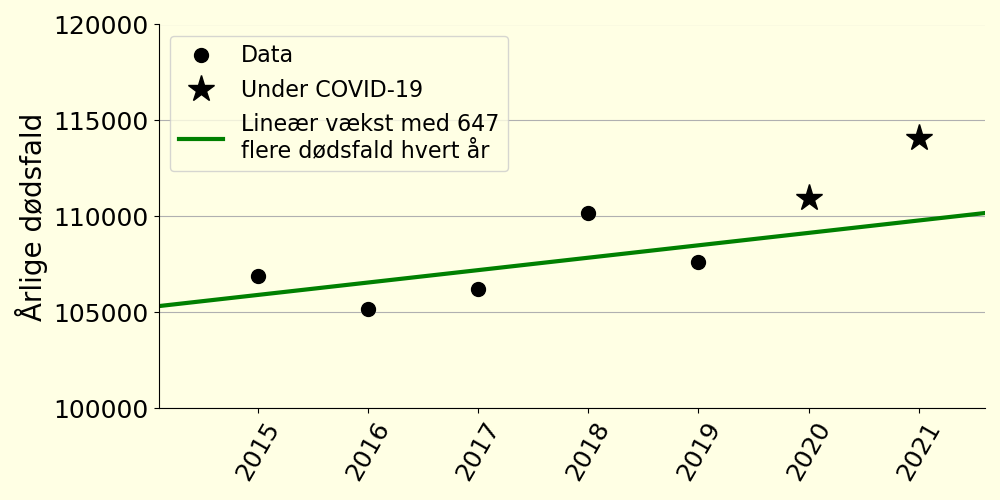

In [179]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(yearRange,tot_DK,'k.',markersize=20,label='Data',zorder=5)
ax.plot(yearRangeFull[-3:-1],totFull_DK[-3:-1],'k*',markersize=20,label='Under COVID-19') 
# ax.bar(yearRange,tot_DK,color='k')
# ax.bar(yearRangeFull[-3:-1],totFull_DK[-3:-1],color='k')

ax.plot(yearRangeFull,funcLin(yearRangeFull),color='g',label=f'Lineær vækst med {slope:3.0f}\nflere dødsfald hvert år')

# ax.axhline(avgLastFive,color='b',label=f'Gennemsnit fra 2015 til 2019: {avgLastFive:5.0f}',zorder=4)

# ax.set_ylim([100000,115000])
ax.set_ylim([100000,120000])
ax.set_yticks(np.arange(100000,120000+1,5000))

ax.set_ylabel('Årlige dødsfald')


firstYear = 2015
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))

ax.legend()

fig.tight_layout()

if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2015linear')

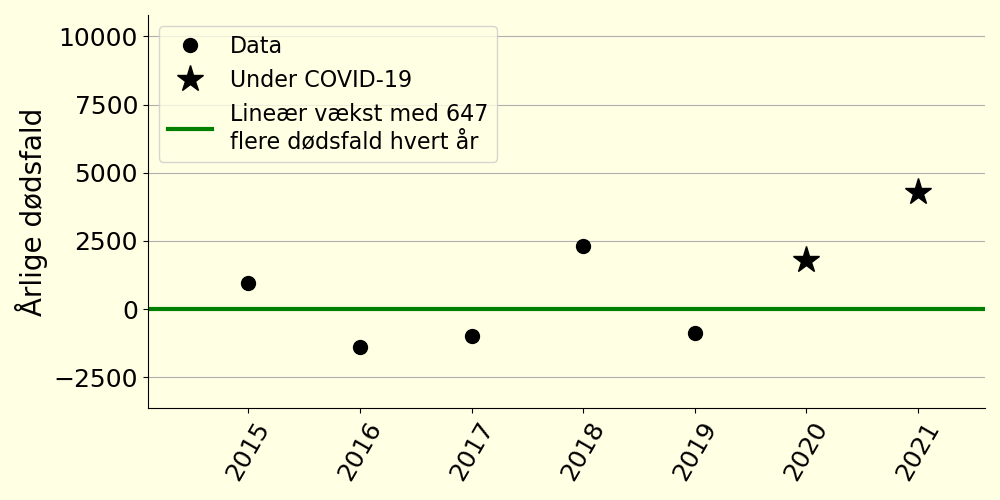

In [178]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(yearRange,tot_DK-funcLin(yearRange),'k.',markersize=20,label='Data',zorder=5)
ax.plot(yearRangeFull[-3:-1],totFull_DK[-3:-1]-funcLin(yearRangeFull[-3:-1]),'k*',markersize=20,label='Under COVID-19') 
# ax.bar(yearRange,tot_DK,color='k')
# ax.bar(yearRangeFull[-3:-1],totFull_DK[-3:-1],color='k')

# ax.plot(yearRangeFull,funcLin(yearRangeFull),color='g',label=f'Lineær vækst med {slope:3.0f}\nflere dødsfald hvert år')
ax.axhline(0,color='g',label=f'Lineær vækst med {slope:3.0f}\nflere dødsfald hvert år')

# ax.axhline(avgLastFive,color='b',label=f'Gennemsnit fra 2015 til 2019: {avgLastFive:5.0f}',zorder=4)


# # ax.set_ylim([100000,115000])
# ax.set_ylim([100000,120000])
# ax.set_yticks(np.arange(100000,120000+1,5000))

ax.set_ylabel('Årlige dødsfald')


firstYear = 2015
lastYear = 2021
ax.set_xlim([firstYear-0.9,lastYear+0.6])
ax.set_xticks(np.arange(firstYear,lastYear+1))
ax.set_xticklabels(ax.get_xticks(),rotation=60)
# ax.set_xticklabels(np.arange(firstYear-2000,lastYear+1-2000))

ax.legend(loc='upper left')

fig.tight_layout()

if saveFigures:
    fig.savefig(pathFigs + 'DK_AlleDoedsfald_2015linear_residual')

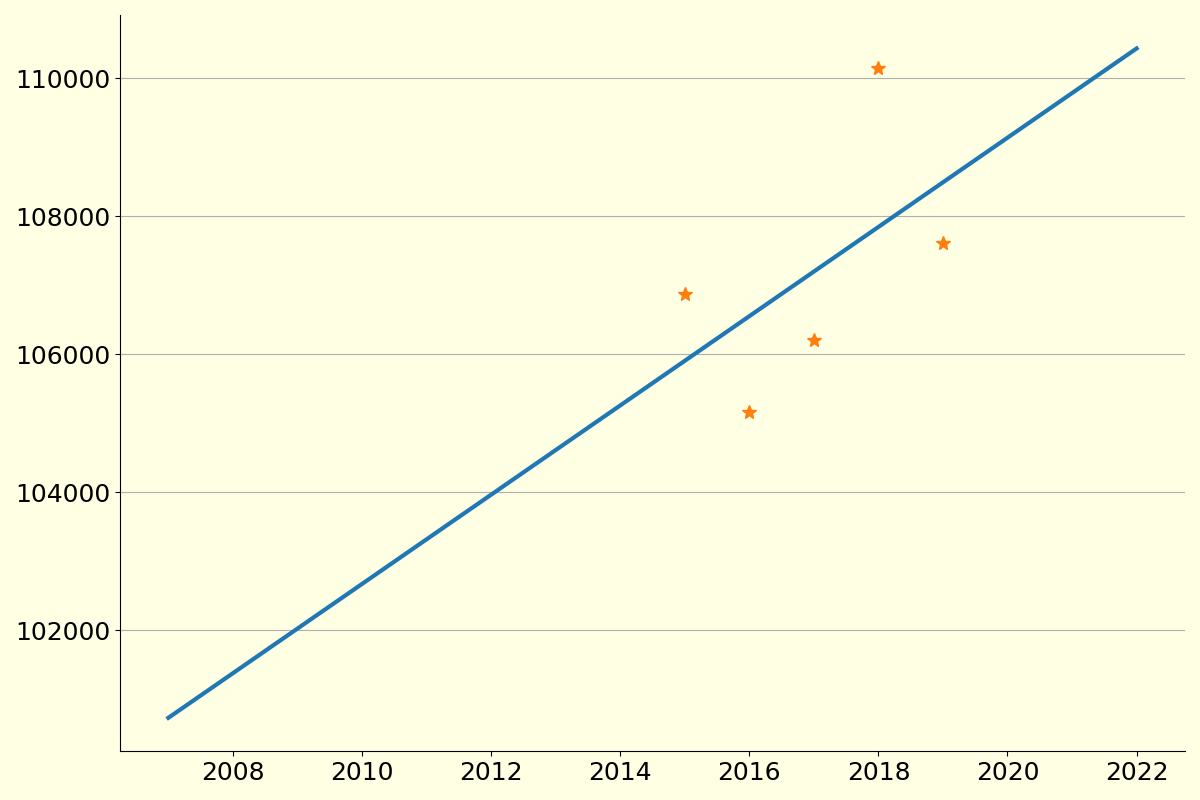

In [159]:
fig,ax = plt.subplots()

ax.plot(yearRangeFull,funcLin(yearRangeFull))
ax.plot(curX,curY,'*')